In [1]:
# Here we import all the necessary modules and libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
# We read the provided dataset using the read_csv function from pandas
df = pd.read_csv('MedicalInsurance_prediction.csv')

In [3]:
# .head() returns us the first 5 rows of the dataset. we can see as many rows as we want by specifying the number in the paranthesis. 
# If we want to see the bottom 5 rows then we use the tail method.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Here we try to change all the data which is not in numerical format because the model understands only numerical values.
gender = ['sex']

def mapping1(x):
  return x.map({'female':0 , 'male':1})

df['sex'] = mapping1(df['sex'])

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [6]:
smoke = ['smoker']
def mapping2(x):
  return x.map({'no':0 , 'yes':1})

df['smoker'] = mapping2(df['smoker'])

In [7]:
reg = ['region']
def mapping3(x):
  return x.map({'southwest':+1 , 'southeast':-1, 'northwest':+1, 'northeast':-1})

df['region'] = mapping3(df['region'])

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,-1,1725.55230
2,28,1,33.000,3,0,-1,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [24]:
# We check for any missing value.it returns true for null values and false for non-null vlaues. 
# Using .sum() returns us the number of missing values.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# It finds the pairwise correlation between the columns
correlation = df.corr()

In [11]:
# Here we drop the charges column in x.As we want to predict the charges we store it in y.
x=df.drop(['charges'], axis=1)
y=df['charges']

In [12]:
x.head()
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [13]:
# Here we divide the dataset into training set and test set.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0
                                                 .25, random_state=42)

In [14]:
print(x_train.shape,x_test.shape,y_train.shape)

(1003, 6) (335, 6) (1003,)


In [15]:
# We use the XGBRegressor as our model
model = XGBRegressor()

In [16]:
# .fit is used to find the required formula to find a relation between the input and the output values
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
# here it predicts the output of the training dataset
training_prediction = model.predict(x_train)

In [18]:
print(training_prediction)

[ 2588.7915  4553.743   9496.523  ... 11708.568  45726.23   10815.08  ]


In [19]:
# the r2_score gives us the variation of the results from the predicted data to the actual output data and 
# also we find the mean absoulte error between the predicted and the actual values.
score_1 = metrics.r2_score(y_train, training_prediction)
score_2 = metrics.mean_absolute_error(y_train, training_prediction)

print('score 1',score_1)
print('score 2',score_2)

score 1 0.993100876043572
score 2 526.2122166703796


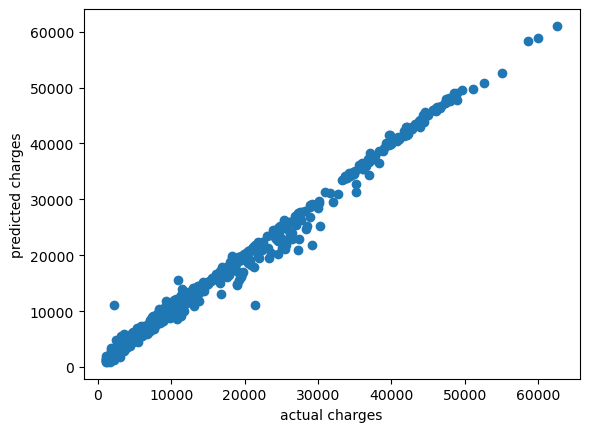

In [20]:
# using the matplotlib module we represent it in the graph
plt.scatter(y_train, training_prediction)
plt.xlabel('actual charges')
plt.ylabel('predicted charges')
plt.show()

In [21]:
# Now we predict the output values of the test dataset
test_data_prediction = model.predict(x_test)

In [22]:
# Here we again find the deviation from the actual out values using the r2 score and aslo find the mean absolute error
s1 = metrics.r2_score(y_test,test_data_prediction)
s2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print('score 1',s1)
print('score 2',s2)

score 1 0.8178923071953413
score 2 2861.0386655904963


In [ ]:
# so we get an r2 score of 0.81 the closer the value to 1 the better model it is.

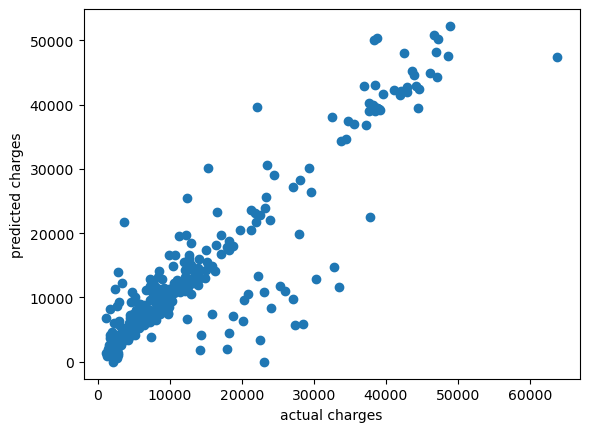

In [23]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('actual charges')
plt.ylabel('predicted charges')
plt.show()